In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd

In [3]:
# wrapper around reader functions to return a single combined dataframe
from mmctools.dataloaders import read_dir, read_date_dirs, read_files

In [4]:
from mmctools.plotting import plot_timeheight

# Example: Data processing (of data organized into subdirectories)
- Combine a series of data files, located within a collection of date-time subdirectories, into one dataframe.
- Do a quick data check of the data at the end (make a time-height plot)

Note: This *may* be no longer needed since the `dap-py` and the online [DAP](https://a2e.energy.gov/data) interfaces both appear to consistently download files into a single directory. In the past, some datasets had data organized into subdirectories. This also introduced an additional processing step to parse date-time information from the subdirectory name and then add it to the timestamps in each subdirectory datafile. 

In [5]:
# dataset name format: project/class.instance.level
dataset = 'wfip2/sodar.z12.b0' 
startdate = pd.to_datetime('2016-10-30')
enddate = pd.to_datetime('2016-11-02')

# optional dataset file specs
dataext = 'txt' # file type, dictated by extension
dataext1 = None # 'winds' # e.g., *.winds.txt

download_path = 'data'
overwrite_files = False # force download even if files already exist

## Collect downloaded data from the DAP

In [6]:
datapath = os.path.join(download_path, dataset.replace('/','.'))
print('Data path:',datapath)

Data path: data/wfip2.sodar.z12.b0


In [7]:
ls $datapath

201610/ 201611/


## Process the downloaded files

In [8]:
%%time
df = read_date_dirs(datapath, # default reader=pd.read_csv,
                    expected_date_format='%Y%m', ext='txt',
                    # additional reader arguments:
                    parse_dates=['date_time'])

Processing data/wfip2.sodar.z12.b0/201610
  288 dataframes added
Processing data/wfip2.sodar.z12.b0/201611
  144 dataframes added
CPU times: user 731 ms, sys: 32.2 ms, total: 763 ms
Wall time: 761 ms


In [9]:
df.head()

,date_time,height,direction,speed,vert,turbulence
0,2016-10-30,40,88.9,3.74,-0.15,0.09
1,2016-10-30,50,86.7,3.70,-0.17,0.09
2,2016-10-30,60,84.2,3.79,-0.17,0.09
3,2016-10-30,80,87.8,3.90,-0.15,0.10
4,2016-10-30,100,85.0,3.73,-0.15,0.09


## Standardization

In [10]:
# create multi-indexed dataframe with standard names
df = df.rename(columns={
    'date_time':'datetime',
    'speed':'wspd',
    'direction':'wdir',
    'vert':'w',
})
df = df.set_index(['datetime','height'])

In [11]:
df.head()

wdir  wspd     w  turbulence
datetime   height                              
2016-10-30 40      88.9  3.74 -0.15        0.09
           50      86.7  3.70 -0.17        0.09
           60      84.2  3.79 -0.17        0.09
           80      87.8  3.90 -0.15        0.10
           100     85.0  3.73 -0.15        0.09

In [12]:
df.tail()

wdir  wspd     w  turbulence
datetime            height                               
2016-11-01 23:50:00 120     281.8  5.97  0.18        0.07
                    140     283.5  6.11  0.17        0.07
                    160     285.9  6.37  0.15        0.06
                    180     284.9  5.94  0.15        0.07
                    200       NaN   NaN   NaN         NaN

## Check the data
See [example_plotting.ipynb](https://github.com/a2e-mmc/mmctools/blob/dev/example_plotting.ipynb) for more plotting-specific examples.

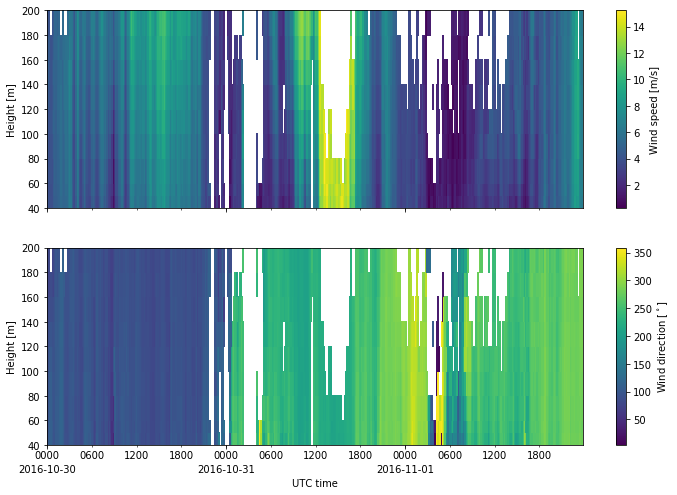

In [13]:
fig,ax,cbars = plot_timeheight(df, fields=['wspd','wdir'])